In [29]:
#dependencies
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
sns.set_palette("pastel")

In [30]:
data = pd.read_csv('../../data/train_month_3_with_target.csv',parse_dates = [29,30,32])
# cast types 
cols_binary = ['homebanking_active', 'has_homebanking',
       'has_insurance_21', 'has_insurance_23', 'has_life_insurance_fixed_cap',
       'has_life_insurance_decreasing_cap', 'has_fire_car_other_insurance',
       'has_personal_loan', 'has_mortgage_loan', 'has_current_account',
       'has_pension_saving', 'has_savings_account',
       'has_savings_account_starter', 'has_current_account_starter','customer_self_employed']

data[cols_binary] = data[cols_binary].astype('bool')
data['target'] = data['target'].astype('bool')

cols_object = ['customer_occupation_code', 'customer_postal_code', 'customer_education', 'customer_children',
       'customer_relationship','customer_gender']

data[cols_object] = data[cols_object].astype('object')


# Date to years value conversion 
data['customer_since_all_years'] = (2018-data.customer_since_all.dt.year)
data['customer_since_bank_years'] = (2018-data.customer_since_bank.dt.year)
data['customer_age'] = (2018-data.customer_birth_date.dt.year)

In [31]:
data.select_dtypes(include = 'number').columns

Index(['bal_insurance_21', 'bal_insurance_23', 'cap_life_insurance_fixed_cap',
       'cap_life_insurance_decreasing_cap', 'prem_fire_car_other_insurance',
       'bal_personal_loan', 'bal_mortgage_loan', 'bal_current_account',
       'bal_pension_saving', 'bal_savings_account',
       'bal_savings_account_starter', 'bal_current_account_starter',
       'visits_distinct_so', 'visits_distinct_so_areas',
       'customer_since_all_years', 'customer_since_bank_years',
       'customer_age'],
      dtype='object')

[    0. 10290. 21310. 50000.]
[-1000.     0.   580. 20000.]


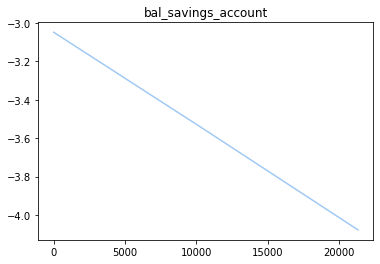

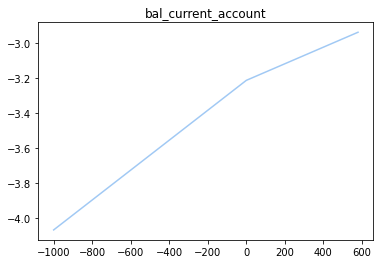

In [14]:
# df = data.select_dtypes(include = 'number', exclude = 'bool')
df = data.copy()
df = df[['bal_savings_account','bal_current_account','target']]
for col in ['bal_savings_account','bal_current_account']:
    qc, bins = pd.qcut(data[col],  q = 3, retbins = True)
    print(bins)
    df[str(col+"_qc")] = qc
    x = []
    for i in range(0,3):
        x.append(df[(df[col]>=bins[i])&(df[col]<=bins[i])][col].median())
    p = df.groupby(str(col+"_qc")).target.mean() #probs
    y = np.log(p/(1-p)) #log odds
    plt.figure()
    plt.plot(x,y)
    plt.title(col)

<AxesSubplot:xlabel='target', ylabel='bal_current_account'>

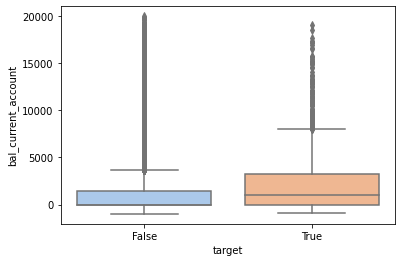

In [35]:
sns.boxplot(data = data, y = 'bal_current_account', x = 'target')